<a href="https://colab.research.google.com/github/tamburins/ESAA_2023/blob/main/ESAA_kaggle(5_26).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


# 패션 MNIST 데이터셋 임포트하기

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# explore data

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

# 데이터 전처리

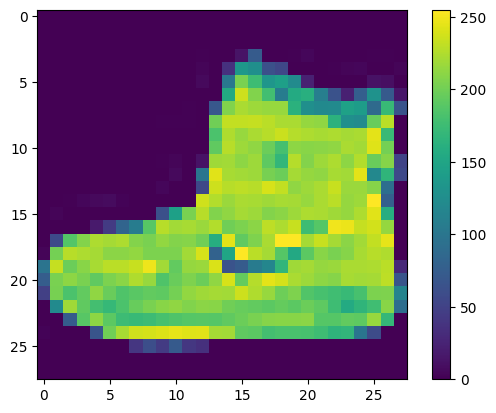

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

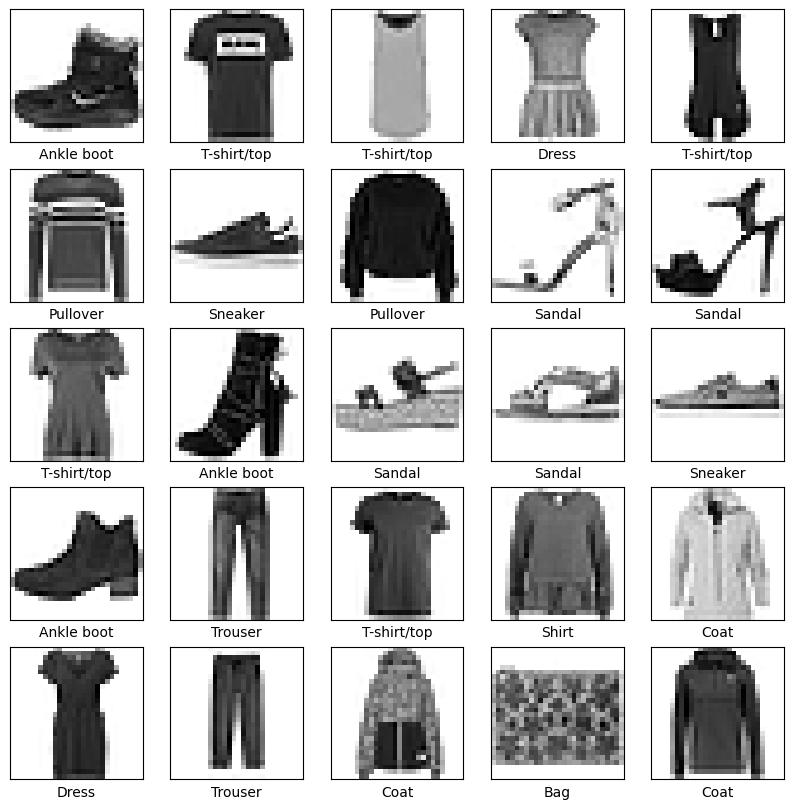

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

# 모델 구성

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [14]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [15]:
# train model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 7ms/step - loss: 0.4977 - accuracy: 0.8255
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3749 - accuracy: 0.8653
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3366 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3147 - accuracy: 0.8847
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2952 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2815 - accuracy: 0.8952
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2681 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2612 - accuracy: 0.9029
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2474 - accuracy: 0.9067
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - los

In [16]:
#evaluate accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\n Test accuracy: ', test_acc)

313/313 - 1s - loss: 0.3340 - accuracy: 0.8824 - 667ms/epoch - 2ms/step

 Test accuracy:  0.8823999762535095


In [17]:
# predict
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [19]:
predictions[0]

array([8.4869299e-07, 2.4437905e-09, 5.7517600e-08, 3.8435202e-10,
       4.1778273e-10, 3.7846726e-04, 7.0121325e-07, 7.2440356e-03,
       6.9948874e-07, 9.9237520e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

9

In [22]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img=true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label ==true_label:
    color='blue'
  else:
    color='red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
  
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

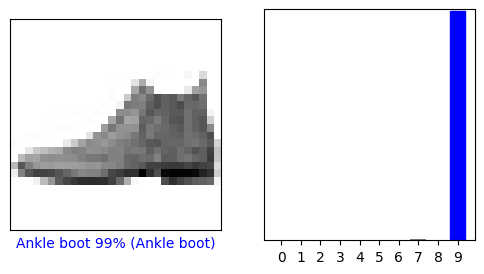

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

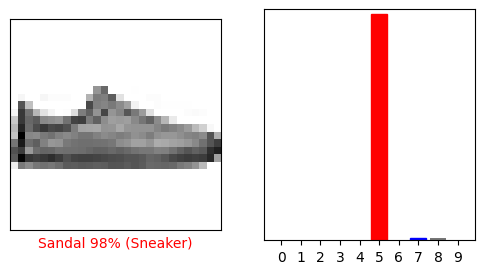

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

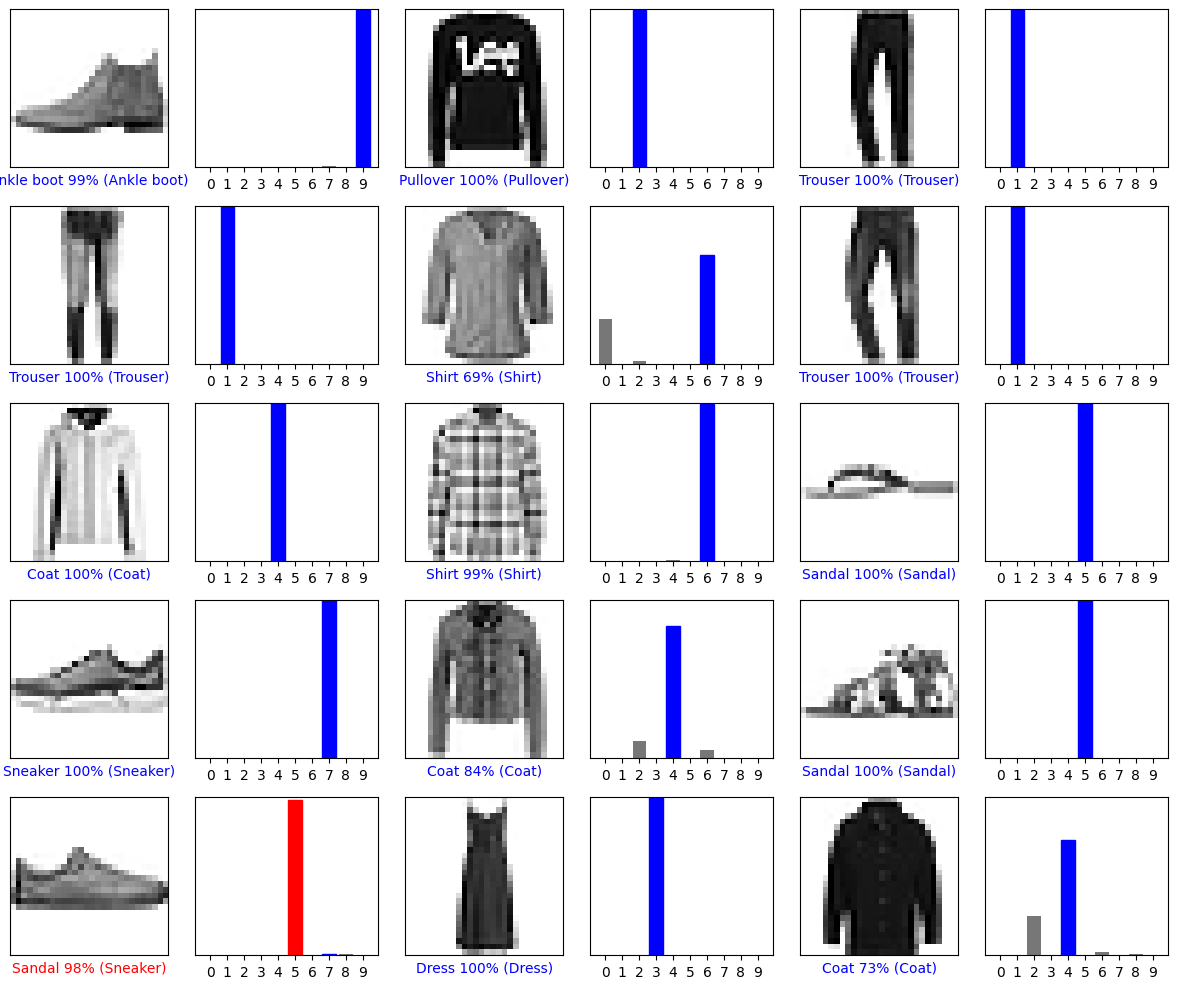

In [25]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# 훈련된 모델 사용하기

In [26]:
img = test_images[1]
print(img.shape)

(28, 28)


In [27]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [28]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 24ms/step
[[1.5254690e-04 2.1516543e-15 9.9632722e-01 7.1471366e-13 1.7733854e-03
  1.3281546e-11 1.7468819e-03 1.7826753e-15 6.8390826e-10 1.2176502e-17]]


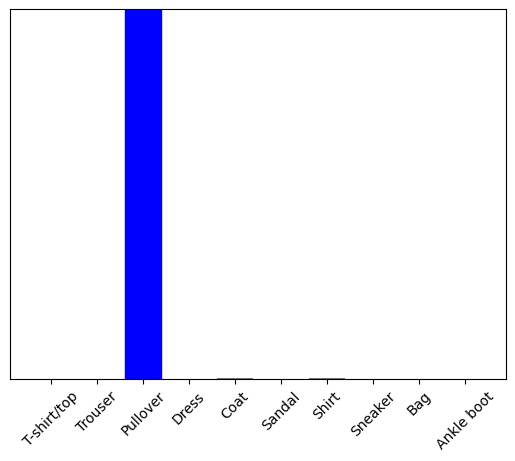

In [29]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [30]:
np.argmax(predictions_single[0])

2